<a href="https://colab.research.google.com/github/anandaptralmira/classification/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All data information

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

In [4]:
# import data to colab
df_dep = pd.read_csv('https://raw.githubusercontent.com/anandaptralmira/classification/master/data/bank.csv', sep= ',')
df_dep

# have a grasp of the data
df_dep.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# show the dataset information
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# check for missing value
df_dep.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Descriptive Statistic

In [7]:
# show the descriptive statistics of the numerical attributes
df_dep.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
# show the types of the categorical attributes
for col in df_dep.select_dtypes(include='object').columns:
  print(col)
  print(df_dep[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [9]:
# drop the duration variable
df_dep.drop("duration", axis=1, inplace=True)

Checking class balance

In [15]:
# checking class balance
df_dep.deposit.value_counts()/df_dep.deposit.count()

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

partitioning

In [24]:
# preserve class proportion using StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1) # the proportion is 70:30
for train_index, test_index in sss.split(df_dep.drop("deposit", axis=1), df_dep.deposit):
      traindf=df_dep.loc[train_index]
      testdf=df_dep.loc[test_index]

Data preprocessing

In [25]:
# encoding target label
LE=LabelEncoder()
df_dep['deposit']=LE.fit_transform(df_dep.deposit.values)

# encoding categorical features
df_dep=pd.get_dummies(df_dep)

df_dep

,age,balance,day,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,1,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,54,184,5,2,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
11159,32,29,19,2,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,2,172,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [28]:
# partitioning again
for train_index, test_index in sss.split(df_dep.drop("deposit", axis=1), df_dep.deposit):
  traindf=df_dep.loc[train_index]
  testdf=df_dep.loc[test_index]

In [31]:
# partition x/y
xtrain=traindf.drop('deposit', axis=1)
ytrain=traindf.deposit

xtest=testdf.drop('deposit', axis=1)
ytest=testdf.deposit

ytest

304     1
5524    0
3033    1
3067    1
3155    1
       ..
5434    0
9922    0
2949    1
2297    1
2474    1
Name: deposit, Length: 3349, dtype: int64

Classification Model

NAIVE BAYES

In [32]:
# modelling Naive Bayes Classifier
gnb = GaussianNB()
#gnb_scores = cross_val_score(gnb, xtrain, ytrain, cv=3)
gnb.fit(xtrain,ytrain)

# predict to test data
y_pred_gnb = gnb.predict(xtest)

In [33]:
# show the confusion matrix
cm_gnb = metrics.confusion_matrix(ytest, y_pred_gnb)
cm_gnb

array([[1460,  302],
       [ 704,  883]])

In [35]:
# show the accuracy, precision, recall
acc_gnb = metrics.accuracy_score(ytest, y_pred_gnb)
prec_gnb = metrics.precision_score(ytest, y_pred_gnb)
rec_gnb = metrics.recall_score(ytest, y_pred_gnb)
f1_gnb = metrics.f1_score(ytest, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(ytest, y_pred_gnb)

print('Accuracy:', acc_gnb)
print('Precision:', prec_gnb)
print('Recall:', rec_gnb)
print('F1 Score:', f1_gnb)
print('Cohens Kappa Score:', kappa_gnb)

Accuracy: 0.6996118244252015
Precision: 0.7451476793248946
Recall: 0.5563957151858853
F1 Score: 0.6370851370851371
Cohens Kappa Score: 0.3899042381005672


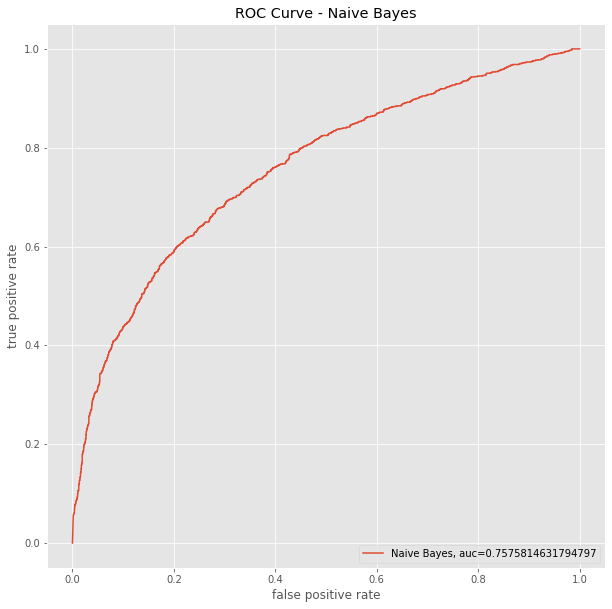

In [36]:
# personalize the visualization
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

# ROC Curve
y_pred_gnb_prob = gnb.predict_proba(xtest)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(ytest,  y_pred_gnb_prob)
aucgnb = metrics.roc_auc_score(ytest, y_pred_gnb_prob)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

KNN

In [37]:
# modeling
knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain, ytrain)

# predict to test data
y_pred_knn = knn_clf.predict(xtest)

In [38]:
# show the confusion matrix
cm_knn = metrics.confusion_matrix(ytest, y_pred_knn)
cm_knn

array([[1148,  614],
       [ 778,  809]])

In [39]:
# show the accuracy, precision, recall
acc_knn = metrics.accuracy_score(ytest, y_pred_knn)
prec_knn = metrics.precision_score(ytest, y_pred_knn)
rec_knn = metrics.recall_score(ytest, y_pred_knn)
f1_knn = metrics.f1_score(ytest, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(ytest, y_pred_knn)

print('Accuracy:', acc_knn)
print('Precision:', prec_knn)
print('Recall:', rec_knn)
print('F1 Score:', f1_knn)
print('Cohens Kappa Score:', kappa_knn)

Accuracy: 0.5843535383696626
Precision: 0.5685172171468728
Recall: 0.5097668557025835
F1 Score: 0.5375415282392026
Cohens Kappa Score: 0.16213122909735067


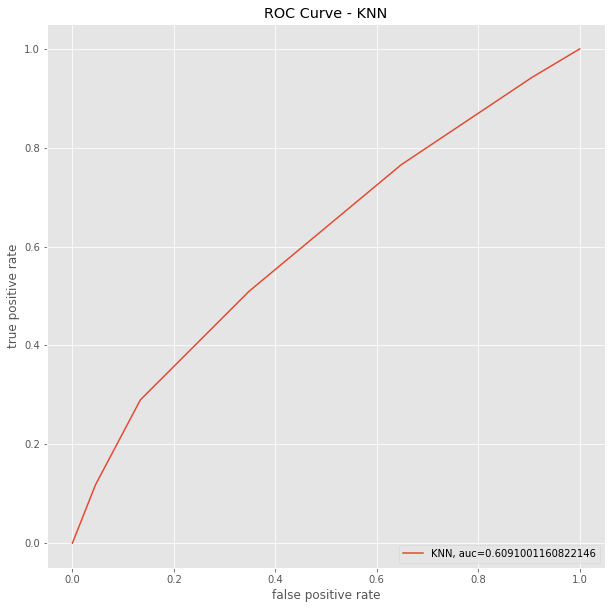

In [40]:
# personalize the visualization
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

# ROC Curve
y_pred_knn_prob = knn_clf.predict_proba(xtest)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(ytest,  y_pred_knn_prob)
aucknn = metrics.roc_auc_score(ytest, y_pred_knn_prob)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

COMPARISON

In [41]:
# comparing model performance
print('Naive-Bayes Accuracy:', acc_gnb)
print('Naive-Bayes Precision:', prec_gnb)
print('Naive-Bayes Recall:', rec_gnb)
print('Naive-Bayes F1 Score:', f1_gnb)
print("---------------------------")
print('KKN Accuracy:', acc_knn)
print('KKN Precision:', prec_knn)
print('KKN Recall:', rec_knn)
print('KKN F1 Score:', f1_knn)

Naive-Bayes Accuracy: 0.6996118244252015
Naive-Bayes Precision: 0.7451476793248946
Naive-Bayes Recall: 0.5563957151858853
Naive-Bayes F1 Score: 0.6370851370851371
---------------------------
KKN Accuracy: 0.5843535383696626
KKN Precision: 0.5685172171468728
KKN Recall: 0.5097668557025835
KKN F1 Score: 0.5375415282392026


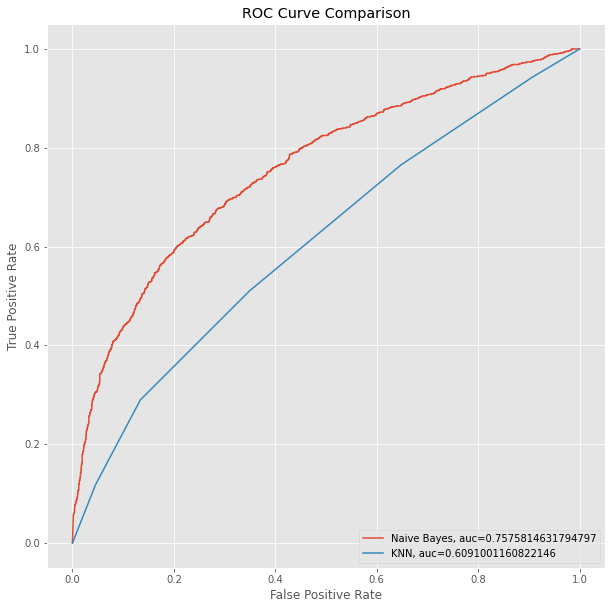

In [42]:
# Comparing ROC Curve
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [43]:
# Create Datafame Contains Fature and Result of prediction
df_compare = xtest.copy()
df_compare['ActualClass'] = ytest
df_compare['NaiveBayes'] = y_pred_gnb
df_compare['KNN'] = y_pred_knn
df_compare.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,NaiveBayes,KNN
304,46,536,16,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
5524,25,148,23,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3033,68,1443,21,2,257,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
3067,87,2190,12,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3155,35,415,4,1,176,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1


CONCLUSION